In [3]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\aryan\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
assets = ['TTM','M&M.NS','HEROMOTOCO.NS','MARUTI.NS','BAJAJ-AUTO.NS']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo',start = '2016-01-01')['Adj Close']

In [5]:
pf_data.tail()

,TTM,M&M.NS,HEROMOTOCO.NS,MARUTI.NS,BAJAJ-AUTO.NS
Date,,,,,
2020-06-16,6.31,506.750000,2395.949951,5502.200195,2718.449951
2020-06-17,6.19,497.600006,2363.300049,5726.200195,2689.449951
2020-06-18,6.37,506.600006,2364.949951,5714.399902,2678.350098
2020-06-19,6.59,500.049988,2355.850098,5897.350098,2674.350098
2020-06-22,6.79,498.750000,2412.600098,5896.000000,2855.750000


In [6]:
pf_data.head()

,TTM,M&M.NS,HEROMOTOCO.NS,MARUTI.NS,BAJAJ-AUTO.NS
Date,,,,,
2015-12-31,29.457693,NaN,NaN,NaN,NaN
2016-01-04,28.318171,592.142761,2252.792725,4364.301758,2179.461182
2016-01-05,27.658445,595.335754,2234.900635,4351.249023,2196.136230
2016-01-06,26.908758,584.350830,2201.892090,4269.167969,2181.347900
2016-01-07,25.259447,570.673096,2152.271729,4066.323730,2123.205322


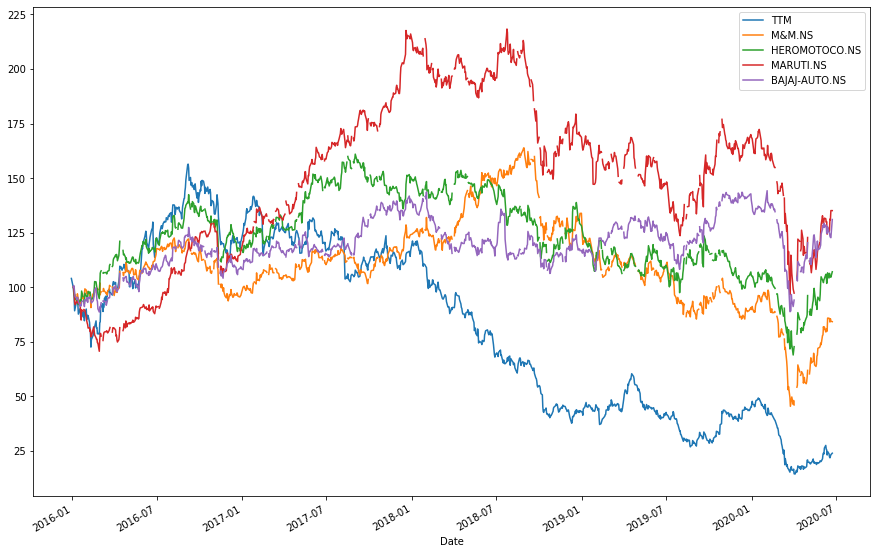

In [7]:
(pf_data/pf_data.iloc[1]* 100).plot(figsize=(15,10))

In [8]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [9]:
log_returns.mean() * 250

TTM             -0.326112
M&M.NS          -0.050715
HEROMOTOCO.NS    0.002171
MARUTI.NS        0.085314
BAJAJ-AUTO.NS    0.071621
dtype: float64

In [10]:
log_returns.cov() * 250

,TTM,M&M.NS,HEROMOTOCO.NS,MARUTI.NS,BAJAJ-AUTO.NS
TTM,0.219567,0.053966,0.047796,0.059642,0.039894
M&M.NS,0.053966,0.095643,0.042080,0.049963,0.035075
HEROMOTOCO.NS,0.047796,0.042080,0.090053,0.052008,0.050294
MARUTI.NS,0.059642,0.049963,0.052008,0.097532,0.041388
BAJAJ-AUTO.NS,0.039894,0.035075,0.050294,0.041388,0.068749


In [11]:
log_returns.corr()

,TTM,M&M.NS,HEROMOTOCO.NS,MARUTI.NS,BAJAJ-AUTO.NS
TTM,1.000000,0.375973,0.343167,0.411467,0.327822
M&M.NS,0.375973,1.000000,0.453416,0.517305,0.432550
HEROMOTOCO.NS,0.343167,0.453416,1.000000,0.554943,0.639206
MARUTI.NS,0.411467,0.517305,0.554943,1.000000,0.505442
BAJAJ-AUTO.NS,0.327822,0.432550,0.639206,0.505442,1.000000


In [12]:
n = len(assets)

In [13]:
n

5

In [14]:
arr = np.random.random(5)
arr

array([0.27410078, 0.71907408, 0.97887974, 0.59446896, 0.69172489])

In [15]:
arr[0]+arr[1]+arr[2]+arr[3]+arr[4]

3.2582484486073007

In [16]:
weights = np.random.random(n)
weights/= np.sum(weights)
weights 

array([0.33454234, 0.10537075, 0.08400717, 0.40576949, 0.07031024])

In [17]:
weights[0] + weights[1]+weights[2] + weights[3]+weights[4] 

1.0

Expected Portfolio return

In [18]:
np.sum(weights * log_returns.mean())*250

-0.0746061916578588

Expected Portfolio variance

In [19]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.07926848739010553

Expected Portfolio volatility

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.28154659896739215

In [21]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
    weights = np.random.random(n)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))
    
pfolio_returns,pfolio_volatilities    

([-0.011957228132478756,
  -0.011630750928497482,
  -0.016204188263438155,
  -0.06841596802349413,
  -0.02397642512371072,
  -0.02067664820783514,
  -0.0036913680817794174,
  -0.011111526898362888,
  -0.05415764158682395,
  -0.09543277187988919,
  -0.08511372288708088,
  -0.08084609368016298,
  -0.07037683542915132,
  -0.07136337051436992,
  -0.02292413122480301,
  -0.006245829324203863,
  -0.03816995758265055,
  -0.03613539901858067,
  0.003229820657113699,
  -0.09213268822135423,
  -0.055821210731380216,
  -0.07322634391632386,
  -0.04908223086208023,
  -0.11769252895689267,
  -0.15753103418948908,
  -0.006476200106737404,
  -0.11259498739418357,
  -0.06652301718868242,
  -0.02670148049596293,
  -0.013989341975635294,
  -0.08053412158422334,
  -0.17625903620775588,
  -0.09590981554738562,
  -0.04720328436528205,
  0.015609268531176109,
  -0.026059231087551062,
  -0.04946596000275363,
  -0.01469426185845447,
  -0.030951356271886634,
  -0.027003170052824512,
  -0.0046954593612807995,
 

In [22]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
    weights = np.random.random(n)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns,pfolio_volatilities

(array([-3.44330968e-02, -2.49432342e-03, -1.30699128e-02,  2.21332067e-02,
        -1.10268066e-01, -8.25389834e-02, -7.92190377e-02, -4.25853413e-03,
        -6.66594191e-02, -4.97616981e-02, -6.79968486e-02, -7.37389974e-02,
        -8.62288284e-03, -2.03149288e-02, -4.61628551e-02, -9.48622833e-02,
         3.33666730e-02, -9.08245677e-02, -7.87983284e-02,  1.74594734e-02,
        -8.08024157e-02,  3.79752825e-02,  3.76307265e-02, -3.98220982e-02,
        -5.63447211e-02,  5.91843906e-04, -6.56573468e-02, -1.12646384e-01,
         1.12650809e-02, -8.58887883e-02, -1.83361696e-02, -3.91088654e-02,
        -1.17581020e-01, -5.71010550e-02, -3.34696236e-02,  2.42984158e-02,
        -1.03853025e-01, -5.05413137e-02, -5.76582497e-02,  4.63224805e-02,
        -6.20058703e-02, -1.47655560e-02, -5.15991717e-02, -1.43139409e-01,
         7.69003175e-03, -4.89974973e-02, -6.49104548e-02,  2.62268592e-03,
        -4.58891529e-03, -4.97635545e-02, -4.06966023e-02, -4.66216868e-02,
        -5.0

In [23]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities})

In [24]:
portfolios.head()

,Return,Volatility
0,-0.034433,0.057720
1,-0.002494,0.065499
2,-0.013070,0.063304
3,0.022133,0.059401
4,-0.110268,0.077291


In [25]:
portfolios.tail()

,Return,Volatility
995,-0.083307,0.071947
996,0.012319,0.057423
997,-0.042924,0.067328
998,-0.026880,0.059031
999,0.014221,0.054307


Text(0, 0.5, 'Expected Return')

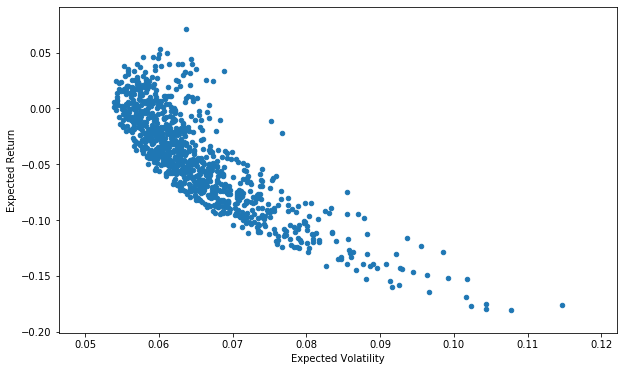

In [36]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [40]:
x = pfolio_volatilities.min()
y = pfolio_returns.max()
print("Best case scenario")
print(x)
print(y)
print("Worst Possible scenario")
p = pfolio_volatilities.max()
q = pfolio_returns.min()
print(p)
print(q)

Best case scenario
0.05390450828891494
0.07100119430219527
Worst Possible scenario
0.1146397966193346
-0.18090720602905008


Best Portfolio possibility : Return = 7.100 %
                             Volatility in investment = 5.3904 %
                             
Worst Portfolio possibility : Return = -18.09 %
                              Volatility in investment = 11.4639%